In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Setup

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Sem6/data-analytics/Projects/Mini Project 3/Data/diabetic_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
data.tail(50)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101716,443237558,93806559,Other,Male,[70-80),?,2,3,7,8,SP,Emergency/Trauma,67,3,35,0,1,0,574,250.5,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101717,443237984,182499863,Caucasian,Male,[50-60),?,1,3,7,9,MC,?,81,6,28,0,0,0,518,410,491,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101718,443245646,99489339,Caucasian,Female,[70-80),?,1,1,7,2,MC,?,48,0,18,0,0,0,428,414,278,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101719,443256548,162949523,Caucasian,Male,[10-20),?,1,7,7,1,?,InternalMedicine,59,6,9,0,0,1,250.13,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101720,443266892,180189752,Caucasian,Male,[50-60),?,2,1,7,5,BC,Family/GeneralPractice,71,5,23,0,0,0,584,276,276,9,None,>7,No,No,No,No,Up,No,No,No,No,Steady,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101721,443282564,106722468,Caucasian,Female,[70-80),?,1,3,7,6,MC,?,40,1,18,9,0,0,599,584,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101722,443694464,40181832,Caucasian,Female,[70-80),?,1,1,7,3,BC,?,58,0,19,0,0,0,486,428,428,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101723,443695760,98476776,Caucasian,Male,[60-70),[150-175),3,6,1,3,UN,?,41,1,13,0,0,0,715,250,401,7,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
101724,443698988,105807996,AfricanAmerican,Male,[60-70),?,6,6,17,7,?,Family/GeneralPractice,91,4,23,0,0,0,518,411,327,9,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
101725,443699066,14701734,Caucasian,Female,[70-80),?,1,1,7,12,?,Surgery-Thoracic,72,6,26,0,0,0,428,38,491,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Running data.info() tells us that there are no null values in the table. However, we can clearly see there are some unknown values as well as strings which won't be useful for training our model. As a result, we'll clean the data and create mappings for each column which will be used in training our model (similar to the ID mappings given along the csv file).

# Ideas

- Get the unique values for all columns to see what the "null" values are
- Drop the following (assuming the cursory analysis was enough):
  - encounter_id
  - patient_nbr
  - weight (around 90% is unknown)
  - payer_code (maybe)
  - medical_specialty
- Clean the following:
  - race (convert to ints)
  - gender (convert to ints)
  - age (convert range to ints)
  - payer_code (if not dropped)
  - medical_specialty
  - all meds columns
  - readmitted
- Figure out the meaning of the following:
  - diag_1 - diag_3
  - payer_code
- After the cleaning, we can run KNN and random forest tests

In [8]:
for col in data:
  print(col.upper() + ':', data[col].unique())

ENCOUNTER_ID: [  2278392    149190     64410 ... 443854148 443857166 443867222]
PATIENT_NBR: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
RACE: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
GENDER: ['Female' 'Male' 'Unknown/Invalid']
AGE: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
WEIGHT: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
ADMISSION_TYPE_ID: [6 1 2 3 4 5 8 7]
DISCHARGE_DISPOSITION_ID: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
ADMISSION_SOURCE_ID: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
TIME_IN_HOSPITAL: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
PAYER_CODE: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
MEDICAL_SPECIALTY: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General'

# Data Cleaning

In [9]:
df = data.drop(['encounter_id', 'patient_nbr', 'medical_specialty', 'payer_code', 'weight', 'diag_1', 'diag_2', 'diag_3'], axis=1)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## Cleaning ```race``` Column

In [10]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [11]:
# Replace the gender values with the following mapping:
# ? -> 0
# Other -> 0
# Caucasian -> 1
# AfricanAmerican -> 2
# Asian -> 3
# Hispanic -> 4
df['race'] = df['race'].replace({'?': 0,
                                 'Other': 0,
                                 'Caucasian': 1,
                                 'AfricanAmerican': 2,
                                 'Asian': 3,
                                 'Hispanic': 4})

In [12]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,1,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,1,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,2,Male,[70-80),1,3,7,3,51,0,16,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,2,Female,[80-90),1,4,5,5,33,3,18,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,1,Male,[70-80),1,1,7,1,53,0,9,1,0,0,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,1,Female,[80-90),2,3,7,10,45,2,21,0,0,1,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## Cleaning ```gender``` Column

In [13]:
# Get the unique values in the gender column
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [14]:
# Check how many values are unknown/invalid
df[df['gender'] == 'Unknown/Invalid']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
30506,0,Unknown/Invalid,[70-80),3,1,1,1,5,5,22,0,0,0,4,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
75551,0,Unknown/Invalid,[60-70),1,1,7,1,38,1,6,0,0,0,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
82573,0,Unknown/Invalid,[70-80),1,22,7,8,59,2,21,0,0,0,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


Since there are only 3/101766 people with an unknown/invalid gender, we can drop them from the data without causing a significant change in our results.

In [15]:
# Remove the rows where the gender is unknown/invalid
df = df[df['gender'] != 'Unknown/Invalid'].reset_index(drop=True)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,1,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,1,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,Male,[70-80),1,3,7,3,51,0,16,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,2,Female,[80-90),1,4,5,5,33,3,18,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101760,1,Male,[70-80),1,1,7,1,53,0,9,1,0,0,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,1,Female,[80-90),2,3,7,10,45,2,21,0,0,1,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [16]:
# Replace the gender values with the following mapping:
# Male -> 0
# Female -> 1
df['gender'] = df['gender'].replace({'Male': 0,
                                     'Female': 1})

In [17]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,[0-10),6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,1,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,1,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,1,0,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,1,0,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,[70-80),1,3,7,3,51,0,16,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,2,1,[80-90),1,4,5,5,33,3,18,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101760,1,0,[70-80),1,1,7,1,53,0,9,1,0,0,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,1,1,[80-90),2,3,7,10,45,2,21,0,0,1,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## Cleaning ```age``` Column

In [18]:
# Get the unique values in the gender column
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [19]:
# Replace the age values according to the following mapping:
# [0-10) -> 0
# [10-20) -> 1
# [20-30) -> 2
# [30-40) -> 3
# [40-50) -> 4
# [50-60) -> 5
# [60-70) -> 6
# [70-80) -> 7
# [80-90) -> 8
# [90-100) -> 9
df['age'] = df['age'].replace({'[0-10)': 0,
                               '[10-20)': 1,
                               '[20-30)': 2,
                               '[30-40)': 3,
                               '[40-50)': 4,
                               '[50-60)': 5,
                               '[60-70)': 6,
                               '[70-80)': 7,
                               '[80-90)': 8,
                               '[90-100)': 9})

In [20]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,0,6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,1,1,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,1,2,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,1,0,3,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,1,0,4,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,7,1,3,7,3,51,0,16,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,2,1,8,1,4,5,5,33,3,18,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101760,1,0,7,1,1,7,1,53,0,9,1,0,0,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,1,1,8,2,3,7,10,45,2,21,0,0,1,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## Cleaning ```max_glu_serum``` Column

In [21]:
# Get the unique values for the max_glu_serum column
df['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [22]:
df['max_glu_serum'] = df['max_glu_serum'].replace({'None': 0,
                                                   'Norm': 1,
                                                   '>200': 2,
                                                   '>300': 3})

In [23]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,0,6,25,1,1,41,0,1,0,0,0,1,0,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,1,1,1,1,7,3,59,0,18,0,0,0,9,0,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,1,2,1,1,7,2,11,5,13,2,0,1,6,0,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,1,0,3,1,1,7,2,44,1,16,0,0,0,7,0,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,1,0,4,1,1,7,1,51,0,8,0,0,0,5,0,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,7,1,3,7,3,51,0,16,0,0,0,9,0,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,2,1,8,1,4,5,5,33,3,18,0,0,1,9,0,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101760,1,0,7,1,1,7,1,53,0,9,1,0,0,13,0,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,1,1,8,2,3,7,10,45,2,21,0,0,1,9,0,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## Cleaning ```A1Cresult``` Column

In [24]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [25]:
df['A1Cresult'] = df['A1Cresult'].replace({'None': 0,
                                           'Norm': 1,
                                           '>7': 2,
                                           '>8': 3})

In [26]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,0,6,25,1,1,41,0,1,0,0,0,1,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,1,1,1,1,7,3,59,0,18,0,0,0,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,1,2,1,1,7,2,11,5,13,2,0,1,6,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,1,0,3,1,1,7,2,44,1,16,0,0,0,7,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,1,0,4,1,1,7,1,51,0,8,0,0,0,5,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,7,1,3,7,3,51,0,16,0,0,0,9,0,3,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,2,1,8,1,4,5,5,33,3,18,0,0,1,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101760,1,0,7,1,1,7,1,53,0,9,1,0,0,13,0,0,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,1,1,8,2,3,7,10,45,2,21,0,0,1,9,0,0,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## Cleaning Medicine Columns

This entails cleaning the following columns:
- metformin
- repaglinide
- nateglinide
- chloropropamide
- glimepiride
- acetohexamide
- glipizide
- glyburide
- tolbutamide
- pioglitazone
- rosiglitazone
- acarbose
- miglitol
- troglitazone
- tolazamide
- examide
- citoglipton
- insulin
- glyburide-metformin
- glypizide-metformin
- glimepiride-pioglitazone
- metformin-rosiglitazone
- metformin-pioglitazone

In [27]:
df = df.iloc[:, 0:42].replace({'Steady': 0,
                               'Up': 1,
                               'Down': -1,
                               'No': -2})

In [28]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,0,6,25,1,1,41,0,1,0,0,0,1,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,NO
1,1,1,1,1,1,7,3,59,0,18,0,0,0,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,Yes,>30
2,2,1,2,1,1,7,2,11,5,13,2,0,1,6,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,Yes,NO
3,1,0,3,1,1,7,2,44,1,16,0,0,0,7,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,Yes,NO
4,1,0,4,1,1,7,1,51,0,8,0,0,0,5,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,7,1,3,7,3,51,0,16,0,0,0,9,0,3,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,Ch,Yes,>30
101759,2,1,8,1,4,5,5,33,3,18,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,Yes,NO
101760,1,0,7,1,1,7,1,53,0,9,1,0,0,13,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,Ch,Yes,NO
101761,1,1,8,2,3,7,10,45,2,21,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,Yes,NO


## Cleaning ```change``` Column

In [29]:
df['change'].unique()

array([-2, 'Ch'], dtype=object)

In [30]:
# Correcting for changing the 'No' value to -2
df['change'] = df['change'].replace({-2: 0,
                                     'Ch': 1})

In [31]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,0,6,25,1,1,41,0,1,0,0,0,1,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,NO
1,1,1,1,1,1,7,3,59,0,18,0,0,0,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,Yes,>30
2,2,1,2,1,1,7,2,11,5,13,2,0,1,6,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,Yes,NO
3,1,0,3,1,1,7,2,44,1,16,0,0,0,7,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,Yes,NO
4,1,0,4,1,1,7,1,51,0,8,0,0,0,5,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,7,1,3,7,3,51,0,16,0,0,0,9,0,3,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,1,Yes,>30
101759,2,1,8,1,4,5,5,33,3,18,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,0,Yes,NO
101760,1,0,7,1,1,7,1,53,0,9,1,0,0,13,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,1,Yes,NO
101761,1,1,8,2,3,7,10,45,2,21,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,Yes,NO


## Cleaning ```diabetesMed``` Column

In [32]:
df['diabetesMed'].unique()

array([-2, 'Yes'], dtype=object)

In [33]:
df['diabetesMed'] = df['diabetesMed'].replace({-2: 0,
                                               'Yes': 1})

In [34]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,0,6,25,1,1,41,0,1,0,0,0,1,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,NO
1,1,1,1,1,1,7,3,59,0,18,0,0,0,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,>30
2,2,1,2,1,1,7,2,11,5,13,2,0,1,6,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,NO
3,1,0,3,1,1,7,2,44,1,16,0,0,0,7,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,NO
4,1,0,4,1,1,7,1,51,0,8,0,0,0,5,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,7,1,3,7,3,51,0,16,0,0,0,9,0,3,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,1,1,>30
101759,2,1,8,1,4,5,5,33,3,18,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,0,1,NO
101760,1,0,7,1,1,7,1,53,0,9,1,0,0,13,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,1,1,NO
101761,1,1,8,2,3,7,10,45,2,21,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,NO


## Cleaning ```readmitted``` Column

In [35]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [36]:
df['readmitted'] = df['readmitted'].replace({'NO': 0,
                                             '<30': 1,
                                             '>30': 2})

In [37]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,1,0,6,25,1,1,41,0,1,0,0,0,1,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0
1,1,1,1,1,1,7,3,59,0,18,0,0,0,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,2
2,2,1,2,1,1,7,2,11,5,13,2,0,1,6,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,0
3,1,0,3,1,1,7,2,44,1,16,0,0,0,7,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0
4,1,0,4,1,1,7,1,51,0,8,0,0,0,5,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,2,0,7,1,3,7,3,51,0,16,0,0,0,9,0,3,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,1,1,2
101759,2,1,8,1,4,5,5,33,3,18,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,0,1,0
101760,1,0,7,1,1,7,1,53,0,9,1,0,0,13,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-1,-2,-2,-2,-2,-2,1,1,0
101761,1,1,8,2,3,7,10,45,2,21,0,0,1,9,0,0,-2,-2,-2,-2,-2,-2,0,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0


In [38]:
# Shows all unique values for our now cleaned data
for col in df:
  print(col.upper() + ':', df[col].unique())

RACE: [1 2 0 3 4]
GENDER: [1 0]
AGE: [0 1 2 3 4 5 6 7 8 9]
ADMISSION_TYPE_ID: [6 1 2 3 4 5 8 7]
DISCHARGE_DISPOSITION_ID: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
ADMISSION_SOURCE_ID: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
TIME_IN_HOSPITAL: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
NUM_LAB_PROCEDURES: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
NUM_PROCEDURES: [0 5 1 6 2 3 4]
NUM_MEDICATIONS: [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46

# EDA and Visualization

# Model Training, Testing, and Splitting

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x = df.drop('readmitted', axis=1)
y = df['readmitted']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

## K-Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Testing with ```n_neighbors=1```

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [45]:
pred = knn.predict(x_test)

In [46]:
print(confusion_matrix(y_test, pred))

[[10863  1625  5584]
 [ 1878   517  1394]
 [ 6001  1294  4426]]


In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59     18072
           1       0.15      0.14      0.14      3789
           2       0.39      0.38      0.38     11721

    accuracy                           0.47     33582
   macro avg       0.37      0.37      0.37     33582
weighted avg       0.46      0.47      0.47     33582



## Finding a $k$ Value with Minimal Error

Text(0, 0.5, 'Error Rate')

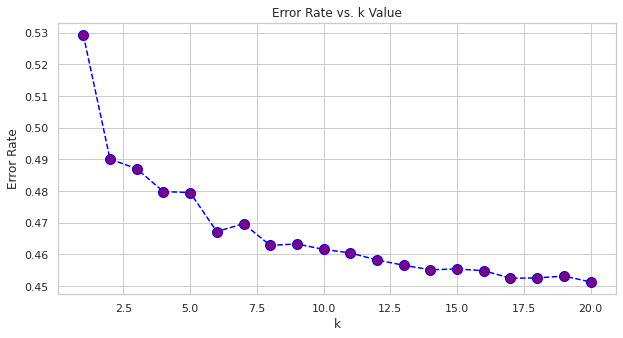

In [48]:
error_rates = []

sns.set_style('whitegrid')

for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rates.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,21), error_rates, color='blue', linestyle='dashed', marker='o',\
         markerfacecolor='purple', markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

## Testing with $k = 20$

In [49]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15360    46  2666]
 [ 2693    60  1036]
 [ 8664    51  3006]]
              precision    recall  f1-score   support

           0       0.57      0.85      0.69     18072
           1       0.38      0.02      0.03      3789
           2       0.45      0.26      0.33     11721

    accuracy                           0.55     33582
   macro avg       0.47      0.37      0.35     33582
weighted avg       0.51      0.55      0.49     33582



## Random Forest

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)

In [52]:
print(confusion_matrix(y_test, pred))

[[10405  1870  5797]
 [ 1712   594  1483]
 [ 5526  1588  4607]]


In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58     18072
           1       0.15      0.16      0.15      3789
           2       0.39      0.39      0.39     11721

    accuracy                           0.46     33582
   macro avg       0.37      0.38      0.37     33582
weighted avg       0.47      0.46      0.47     33582

